In [56]:
import numpy as np
import matplotlib.pyplot as plt

import pyvista as pv
import seaborn as sb

In [2]:
mesh = pv.read('/Users/jrobrien/Dissertation/data/pmsCanister/pmsCanister_v8_tas120_aoa0_900T30_part9/VTK/lagrangian/kinematicCloudTracks/kinematicCloudTracks_1000.vtk')

In [3]:
mesh

PolyData (0x2874c38e0)
  N Cells:    736601
  N Points:   736601
  N Strips:   0
  X Bounds:   -8.000e+00, 1.000e+01
  Y Bounds:   -2.260e-01, 3.260e-03
  Z Bounds:   -1.547e-02, 4.090e-01
  N Arrays:   12

In [4]:
mesh.point_data['age']

pyvista_ndarray([2.652416 , 2.6732497, 2.6940854, ..., 2.7399237,
                 2.7607732, 2.7816212], dtype=float32)

In [82]:
# Create the plotter
pt = pv.Plotter()
# Add the slice mesh
pt.add_mesh(mesh, 
            scalars='U', 
            preference='point'
           )
pt.show()

Widget(value="<iframe src='http://localhost:54039/index.html?ui=P_0x2c274d730_2&reconnect=auto' style='width: …

In [176]:
x = np.where(mesh.point_data['U'][:, 0] == np.min(mesh.point_data['U'][:, 0]))

In [177]:
mesh.points[x, 0]

pyvista_ndarray([[-0.37465885]], dtype=float32)

## Seaborn KDE plot - Kernel Density Estimate

In [219]:
# Find the default particle field on the inlet
def define_space(mesh, x=[-8, -7], y=[-0.1, 0.1], z=[0, 0.4]):
    """ origin is list of 3D coordinates to find location of """
    def intersect(arr, low, high):
        nlow = np.where(arr > low)
        nhigh = np.where(arr < high)
        return np.intersect1d(nlow, nhigh)
    
    def conc(subset, x, y, z):
        """ with subset of particles, give conc of subset """
        volume = (abs(x[1] - x[0]) * abs(y[1] - y[0]) * abs(z[1] - z[0]))
        vol_cc = volume * 1e6
        return subset.shape[0] / vol_cc
      
    # find the points in the mesh near the origin
    # This is ultimately a slice along X; don't care yz distrib
    nx = intersect(mesh.points[:, 0], x[0], x[1])
    ny = intersect(mesh.points[:, 1], y[0], y[1])
    nz = intersect(mesh.points[:, 2], z[0], z[1])
    tmpx = np.intersect1d(nx, ny)
    subset = np.intersect1d(tmpx, nz)
    if subset.shape[0] > 1:
        print(subset.shape, conc(subset, x, y, z), ' per cc')
        return subset
    else:
        raise BaseException('NO VALID SUBSET')

In [220]:
12.4 * 1e6

12400000.0

In [221]:
mesh.points[:, 0]

pyvista_ndarray([-7.4999833, -4.9999595, -2.4998834, ...,  2.999914 ,
                  5.499967 ,  7.9999876], dtype=float32)

In [238]:
goose = define_space(mesh, x=[-8, -7], y=[-0.25, 0.5])

3.0
3000000.0
(48790,) 0.016263333333333335  per cc


In [233]:
newgoose = define_space(mesh, x=[-1, -0.5])

0.4
400000.0
(39300,) 0.09825  per cc


In [234]:
newgoose.shape

(39300,)

In [239]:
goose.shape

(48790,)

### Display KDE of the Inlet `Cloud`

<AxesSubplot: >

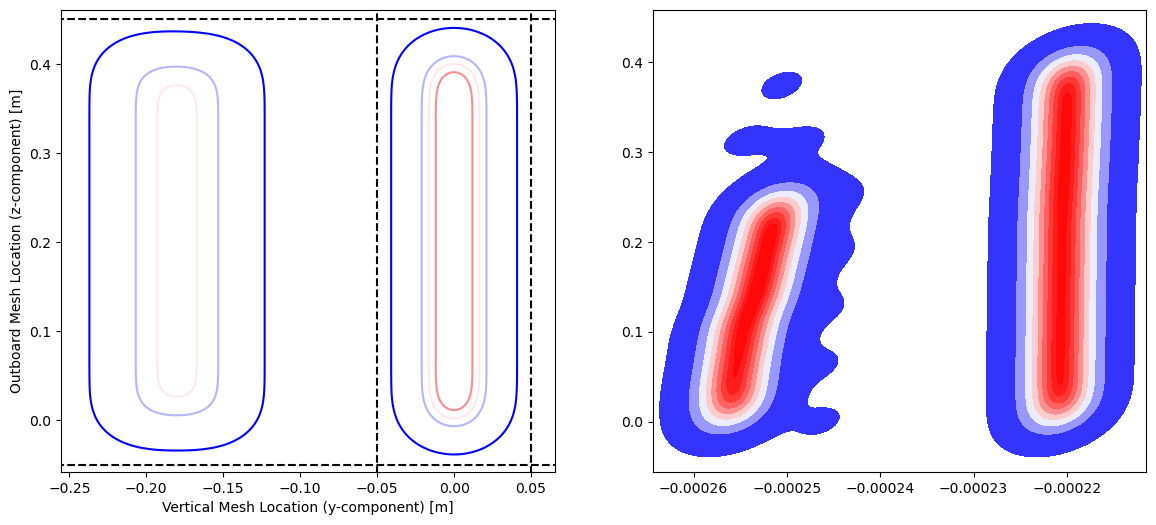

In [247]:
fig, axarr = plt.subplots(1, 2, figsize=[14, 6])
sb.kdeplot(data=mesh.point_data['U'][goose, 0], 
           x=mesh.points[goose, 1], 
           y=mesh.points[goose, 2],
           cmap='bwr',
           levels=5,
           thresh=0.01, 
           shade=False,
           ax=axarr[0],
           cbar=False)
axarr[0].set_ylabel('Outboard Mesh Location (z-component) [m]')
axarr[0].set_xlabel('Vertical Mesh Location (y-component) [m]')
axarr[0].axvline(x=0.05, ymin=-0.1, ymax=20, color='k', linestyle='--')
axarr[0].axvline(x=-0.05, ymin=-0.1, ymax=20, color='k', linestyle='--')
axarr[0].axhline(y=0.45, xmin=-0.1, xmax=20, color='k', linestyle='--')
axarr[0].axhline(y=-0.05, xmin=-0.1, xmax=20, color='k', linestyle='--')
#axarr[0].set_xlim([-0.3, 0.1])
#axarr[0].set_ylim([-0.1, 0.55])

# zoom in boundaries
sb.kdeplot(data=mesh.point_data['U'][newgoose, 0], 
           x=mesh.points[newgoose, 1], 
           y=mesh.points[newgoose, 2],
           cmap='bwr', 
           thresh=0.01, 
           shade=True,
           ax=axarr[1],
           cbar=False)
#axarr[1].set_xlim([-0.3, 0.1])
#axarr[1].set_ylim([-0.1, 0.55])
#axarr[1].set_xlim([0.1, -0.3])
#axarr[1].set_ylim([0.55, -0.1])

### Along Canister

In [198]:
kait = define_space(mesh, x=[0, 1], y=[-3, 3])

(1.0, 0.0)

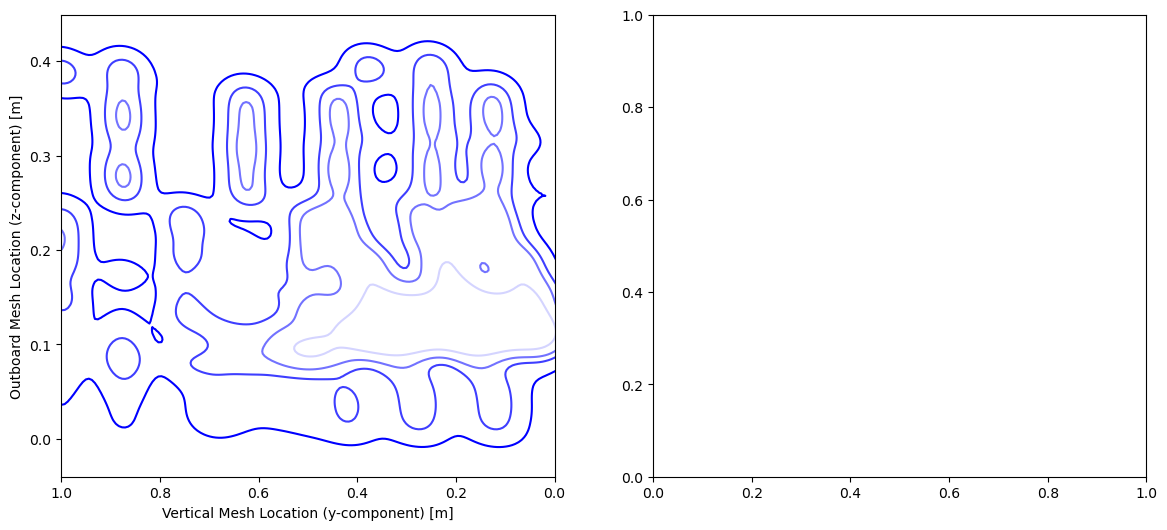

In [249]:
fig, axarr = plt.subplots(1, 2, figsize=[14, 6])
sb.kdeplot(data=mesh.point_data['U'][kait, 0], 
           x=mesh.points[kait, 0], 
           y=mesh.points[kait, 2],
           cmap='bwr',
           levels=5, 
           shade=False,
           ax=axarr[0],
           cbar=False)
axarr[0].set_ylabel('Outboard Mesh Location (z-component) [m]')
axarr[0].set_xlabel('Vertical Mesh Location (y-component) [m]')
#axarr[0].axvline(x=0.05, ymin=-0.1, ymax=20, color='k', linestyle='--')
#axarr[0].axvline(x=-0.05, ymin=-0.1, ymax=20, color='k', linestyle='--')
#axarr[0].axhline(y=0.45, xmin=-0.1, xmax=0.1, color='k', linestyle='--')
#axarr[0].axhline(y=-0.05, xmin=-0.1, xmax=0.1, color='k', linestyle='--')
axarr[0].set_xlim([1, 0])
#axarr[0].set_ylim([0.55, -0.1])

# zoom in boundaries
#sb.kdeplot(data=mesh.point_data['U'][newgoose, 0], 
#           x=mesh.points[newgoose, 1], 
#           y=mesh.points[newgoose, 2],
#           cmap='bwr', 
#           thresh=0.01, 
#           shade=True,
#           ax=axarr[1],
#           cbar=True)
#axarr[1].set_xlim([0.1, -0.3])
#axarr[1].set_ylim([0.55, -0.1])

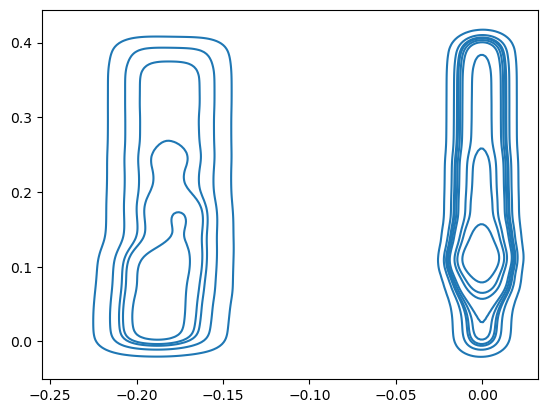

In [25]:
res = sb.kdeplot(data=mesh.point_data['U'][:, 0], x=mesh.points[:, 1], y=mesh.points[:, 2])

In [13]:
mesh.center

[1.0000064373016357, -0.11136700108181685, 0.19675027206540108]

In [9]:
pv.plot(mesh)

Widget(value="<iframe src='http://localhost:54039/index.html?ui=P_0x173506220_1&reconnect=auto' style='width: …